# Movie data analysis
## Rating analysis
### We will start off with the distribution of movie ratings to see the average with an histogram

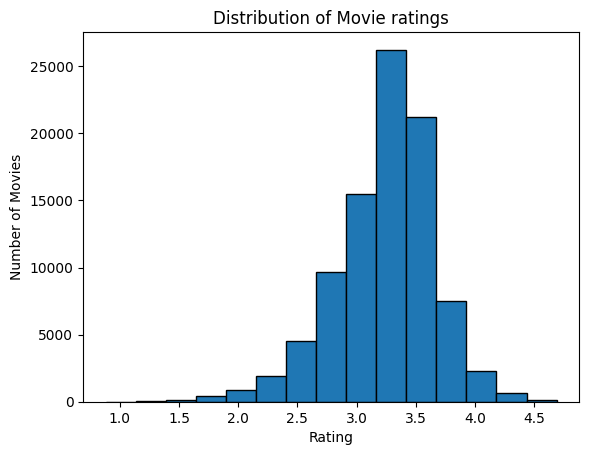

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

movies_cleaned=pd.read_csv('movies_cleaned.csv')

#create a histogram with 15 columns and black background
plt.hist(movies_cleaned['rating'], bins=15, edgecolor='black')

#define the x axis name
plt.xlabel('Rating')

#define the y axis name
plt.ylabel('Number of Movies')

#define the histogram title
plt.title('Distribution of Movie ratings')

#show the histogram
plt.show()

### We can see that there is a high between rating 3.0 and 3.5, so let's see based on genre which has the highest average rating

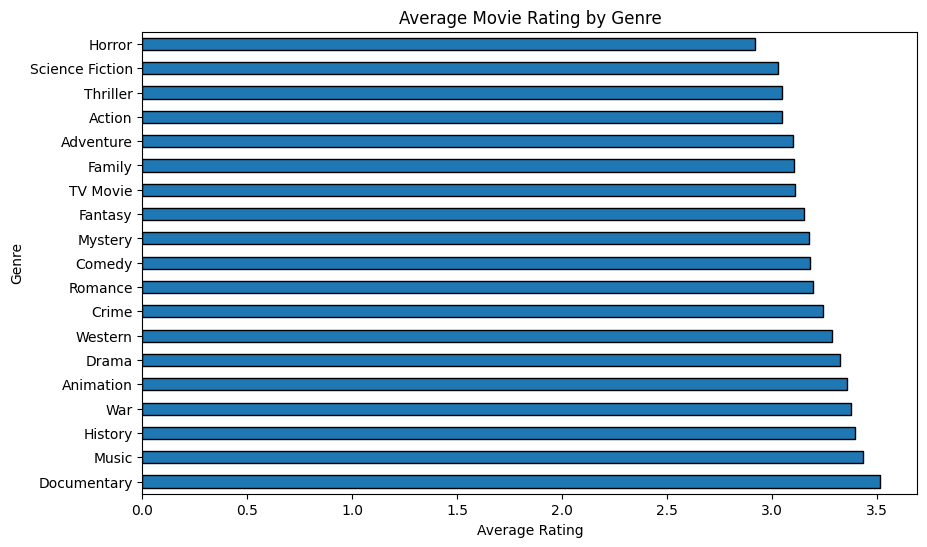

In [2]:
genres_cleaned = pd.read_csv('genres_cleaned.csv')

#merge genres to movies (how='left') based on id
movies_with_genres = movies_cleaned.merge(genres_cleaned, on="id", how="left")

#group the movies by genre and rating, calculate the mean and sort the result
avg_ratings = (
    movies_with_genres.groupby("genre")["rating"]
    .mean()
    .sort_values(ascending=False)
)

#create a new figure (canvas) for plotting
plt.figure(figsize=(10,6))

#create an horizontal bar canvas (barh)
avg_ratings.plot(kind="barh", edgecolor="black")

plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.title("Average Movie Rating by Genre")
plt.show()

### As per this bar chart we can see that documentaries are much more appreciated compared to the other genres while horrors are the least appreciated, but does the historical period influence the rating?
### I start by analyzing the average rating (of all the movies) by year

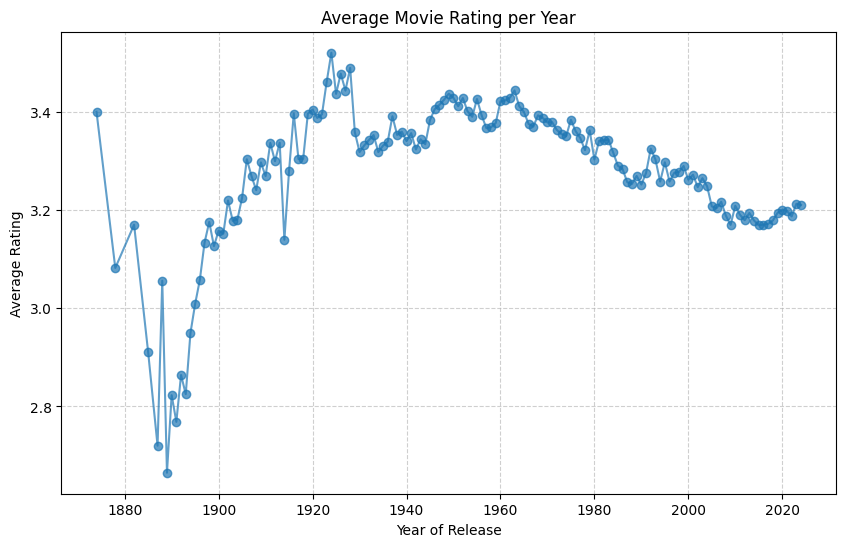

In [3]:
# --- AVERAGE RATING BY YEAR ---

# Grouping the dataframe by year
ratings_by_year = movies_cleaned.groupby('date')['rating'].mean().reset_index()

plt.figure(figsize=(10,6))

# Making the first graphic
plt.plot(ratings_by_year['date'], ratings_by_year['rating'], marker='o', alpha=0.7)

plt.title("Average Movie Rating per Year")

plt.xlabel("Year of Release")
plt.ylabel("Average Rating")

# Add a dashed grid for better visibility
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

### We should then analyze the average rating by decade to avoid biases like low film production in certain years

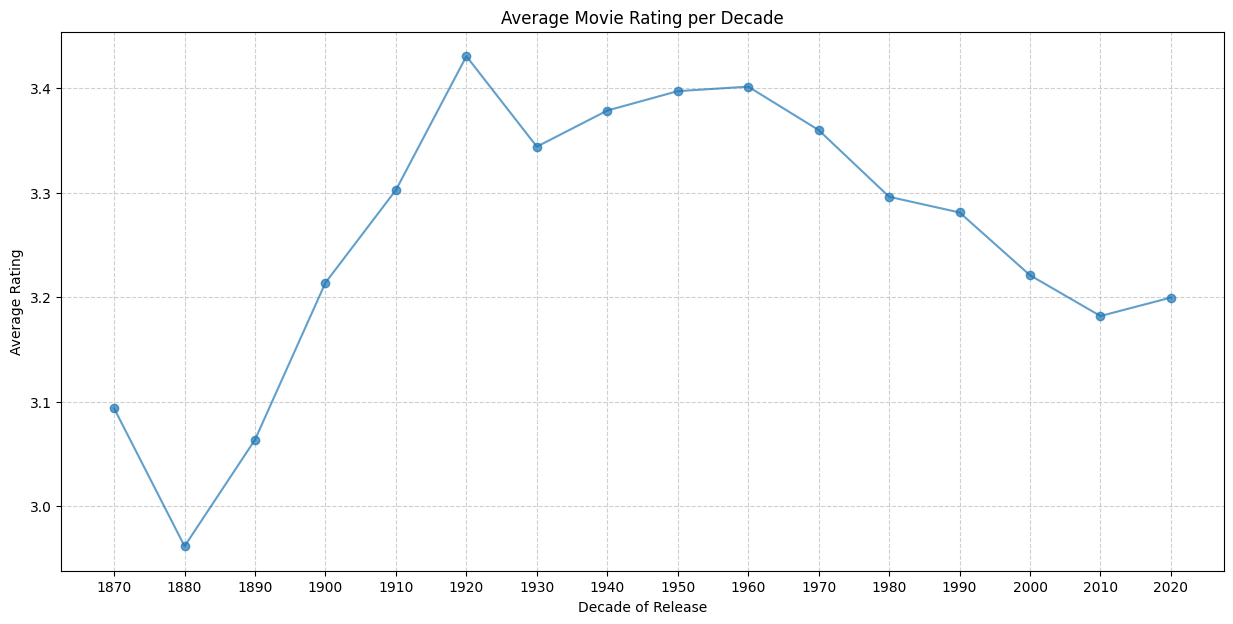

In [4]:
# --- AVERAGE RATING BY DECADE ---

# Creating a new column called 'decade' by dividing the date by 10
# and then multiplying again by 10 to set the least significant to 0
# 1994/10=199 --> 199*10=1990
movies_cleaned['decade'] = (movies_cleaned['date'] // 10) * 10

# Analyze the average of ratings over the course of decades
ratings_by_decade = movies_cleaned.groupby('decade')['rating'].mean().reset_index()

plt.figure(figsize=(15,7))
plt.plot(ratings_by_decade['decade'], ratings_by_decade['rating'], marker='o', alpha=0.7)
plt.title("Average Movie Rating per Decade")
plt.xlabel("Decade of Release")
plt.ylabel("Average Rating")

plt.grid(True, linestyle='--', alpha=0.6)

# Force all decade tags on the x axis
plt.xticks(ratings_by_decade['decade'])
plt.show()

### On the basis of the obtained data, we can notice that the flow of the ratings, be it year by year or by decade, has undergone little to no variations, proving that time has not influenced people's judgment.

## Is the rating of movies of a given genre different today than it used to be?
### We will analyze the data based on the genre with the highest ratings, documentaries, and the genre with the lowest average ratings, horror, to see if the way the two genres are appreciated has changed over time

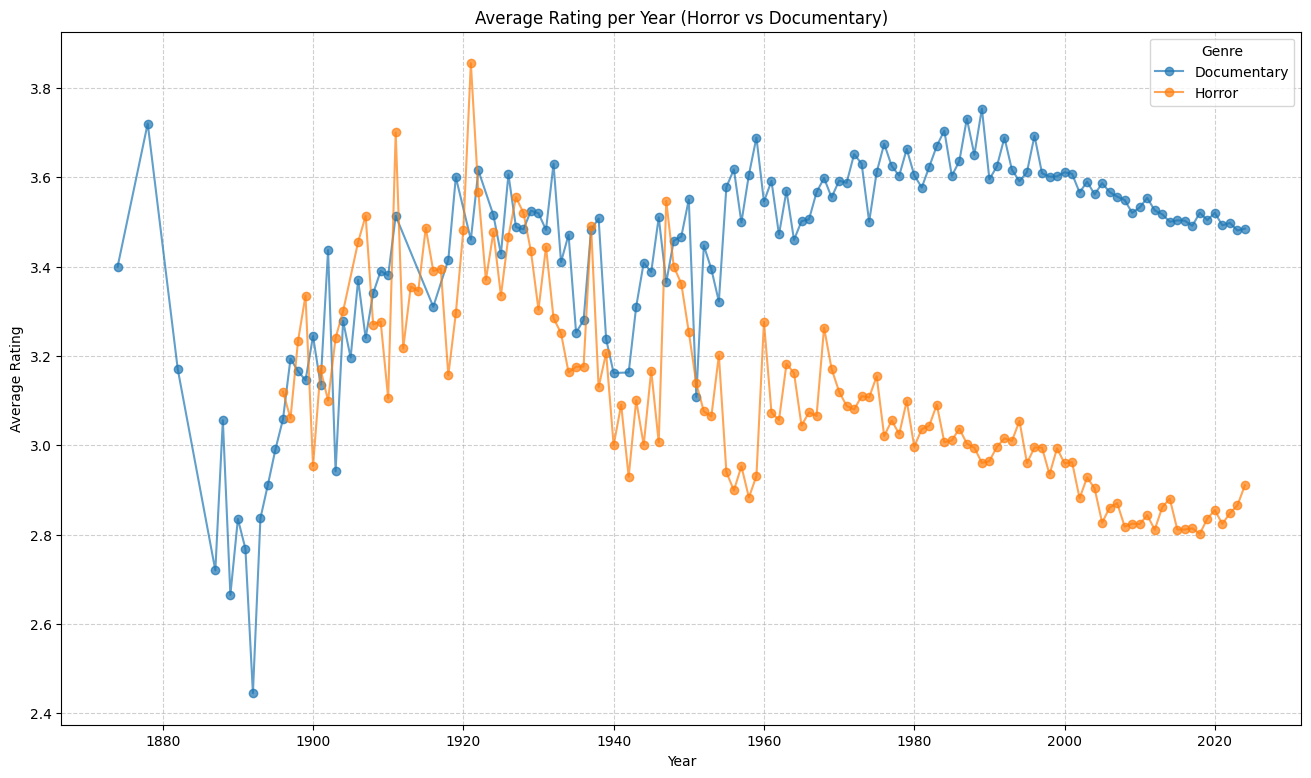

In [5]:
# Filtering from movies with genres only the intended ones
filtered_movies_with_genres = movies_with_genres[movies_with_genres['genre'].isin(['Horror', 'Documentary'])]

# Grouping by date and genre and calculating the rating average per year

ratings_by_year_genre = filtered_movies_with_genres.groupby(['date', 'genre'])['rating'].mean().reset_index()

plt.figure(figsize=(16,9))

# for cycle to draw a line for each different genre present (we have more than one genre)
# .unique() extracts from the genre list with no duplicates (only one horror and one documentary)
for genre in ratings_by_year_genre['genre'].unique():

    # Filtering all data for each genre
    subset = ratings_by_year_genre[ratings_by_year_genre['genre'] == genre]

    #label genre connects the legend to the available genres extracted with .unique (without it we would have multiple documentaries and horrors
    plt.plot(subset['date'], subset['rating'], marker='o', alpha=0.7, label=genre)

plt.title("Average Rating per Year (Horror vs Documentary)")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.legend(title="Genre")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


C:\Users\ricca\AppData\Local\Temp\ipykernel_11964\2173357462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_movies_with_genres.loc[:,'decade'] = (filtered_movies_with_genres['date'] // 10) * 10


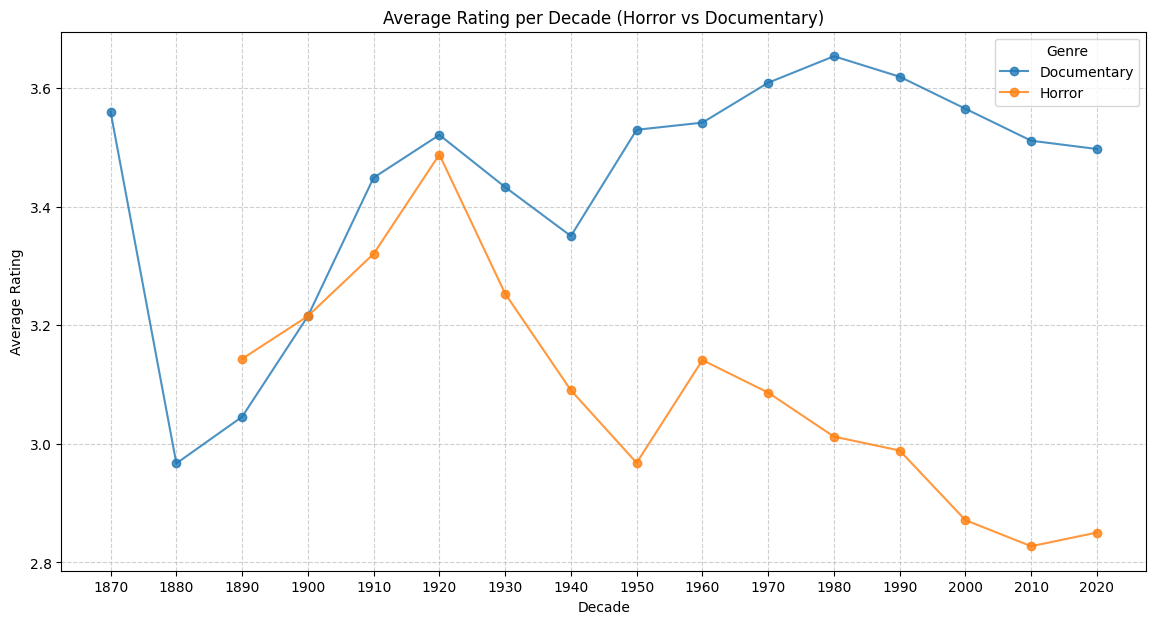

In [6]:
# Average ratings per decade

filtered_movies_with_genres.loc[:,'decade'] = (filtered_movies_with_genres['date'] // 10) * 10
ratings_by_decade_genre = filtered_movies_with_genres.groupby(['decade', 'genre'])['rating'].mean().reset_index()

plt.figure(figsize=(14,7))

for genre in ratings_by_decade_genre['genre'].unique():
    subset = ratings_by_decade_genre[ratings_by_decade_genre['genre'] == genre]
    plt.plot(subset['decade'], subset['rating'], marker='o', alpha=0.8, label=genre)

plt.title("Average Rating per Decade (Horror vs Documentary)")
plt.xlabel("Decade")
plt.ylabel("Average Rating")
plt.xticks(ratings_by_decade_genre['decade'].unique())
plt.legend(title="Genre")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

        id             name  date  rating
0  1000014     Jordan Peele  2017    4.16
1  1000016        Ari Aster  2019    3.78
2  1000026      Mary Harron  2000    3.86
3  1000031       Mark Mylod  2022    3.54
4  1000034  Stanley Kubrick  1980    4.24


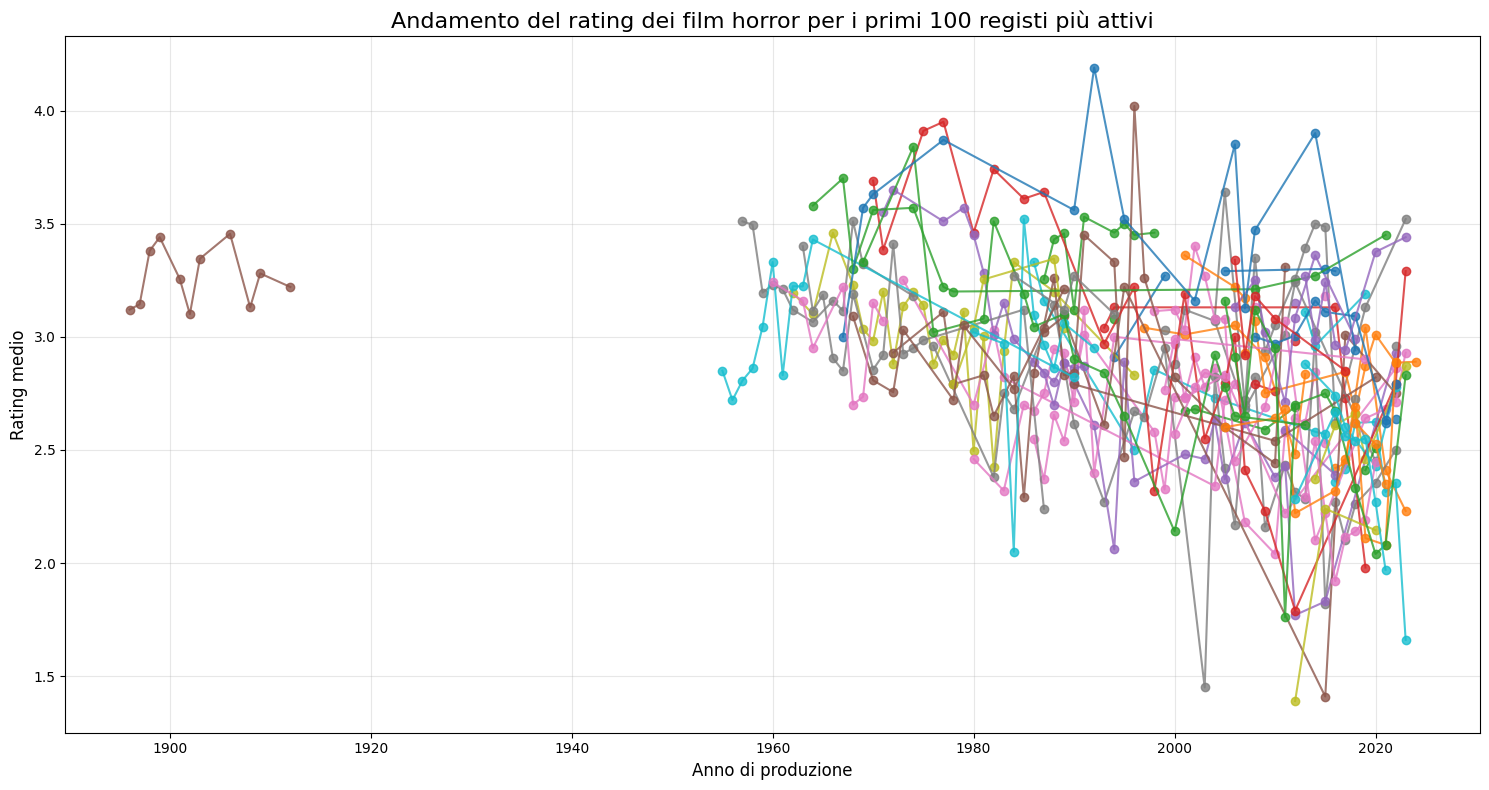

In [14]:
 # Carica i dataset
genres = pd.read_csv("genres_cleaned.csv")
crew = pd.read_csv("crew_cleaned.csv")
year = pd.read_csv("movies_cleaned.csv")
rating = pd.read_csv("movies_cleaned.csv")

# Take only 'HORROR' movies
horror_movies = genres[genres['genre'] == 'Horror']

# Take only 'DIRECTOR' from crew
directors = crew[crew['role'] == 'Director']

# Take only the 'DATE' from movies
year = year[['id','date']]
year['date'] = year['date'].astype('Int64')

# Merge per ottenere solo i registi dei film horror
horror_with_directors = horror_movies.merge(directors, on='id', how='left')

horror_with_directors = horror_with_directors.merge(year[['id','date']], on='id', how='left')

horror_with_directors = horror_with_directors.merge(rating[['id','rating']], on='id', how='left')

# 4. Se vuoi tenere solo le colonne rilevanti
horror_with_directors = horror_with_directors[['id', 'name', 'date', 'rating']]

# Mostra risultato
print(horror_with_directors.head())

# 1. Conta quanti film ha diretto ogni regista
director_counts = horror_with_directors['name'].value_counts()

# 2. Prendi i primi 100 registi
top_100_directors = director_counts.head(100).index

# 3. Filtra solo quei registi
horror_top100 = horror_with_directors[horror_with_directors['name'].isin(top_100_directors)]

# 4. Calcola il rating medio per regista e anno
ratings_by_director_year = (
    horror_top100
    .groupby(['name', 'date'])['rating']
    .mean()
    .reset_index()
)

# 5. Grafico
plt.figure(figsize=(15, 8))

for director in top_100_directors:
    data = ratings_by_director_year[ratings_by_director_year['name'] == director]
    plt.plot(data['date'], data['rating'], marker='o', alpha=0.8, label = director) #alpha=0.5, linewidth=1)

plt.title("Andamento del rating dei film horror per i primi 100 registi più attivi", fontsize=16)
plt.xlabel("Anno di produzione", fontsize=12)
plt.ylabel("Rating medio", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()